In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from scipy.stats import expon, loguniform
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import roc_curve
import numpy as np
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import cross_val_predict, cross_val_score
from sklearn.model_selection import GridSearchCV

from sklearn.impute import SimpleImputer

C:\Users\Kristian Røhne\AppData\Local\Temp\ipykernel_26032\745482481.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
# Load data
df = pd.read_csv("train.csv")
df

,Length (cm),Width (cm),Weight (g),Pericarp Thickness (mm),Seed Count,Capsaicin Content,Vitamin C Content (mg),Sugar Content,Moisture Content,Firmness,color,Harvest Time,Average Daily Temperature During Growth (celcius),Average Temperature During Storage (celcius),Scoville Heat Units (SHU)
0,17.37,5.42,94.30,4.90,193.93,3.21,173.59,6.15,88.59,3.40,red,Midday,8.68,5-6,0.00
1,27.78,4.75,262.71,6.56,186.29,8.19,100.41,2.36,111.20,5.45,green,Midday,22.44,NaN,0.00
2,6.17,3.51,66.72,7.96,298.81,4.69,125.91,6.75,72.98,2.77,red,Midday,24.99,NaN,455995.06
3,6.12,6.07,51.24,4.57,39.36,2.76,143.54,5.93,63.93,1.62,yellow,Midday,13.05,NaN,0.00
4,28.58,4.84,166.51,3.07,194.07,7.01,193.76,2.85,88.19,3.99,red,Midday,27.08,NaN,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,8.67,6.51,19.00,2.87,1.53,0.63,9.02,0.63,95.54,4.86,yellow,Evening,16.57,NaN,88266.90
996,17.17,9.25,150.86,1.41,386.87,2.27,268.93,2.21,131.71,2.59,yellow,Morning,22.39,NaN,0.00
997,14.16,6.87,124.72,1.97,202.83,3.31,203.84,2.90,114.42,3.17,yellow,Evening,15.84,7-8,0.00
998,3.71,7.12,29.53,1.05,115.61,9.80,45.95,2.39,97.70,4.01,green,Evening,16.05,NaN,188390.86


In [3]:
# for comparing different features to each other from the dataset, with hue as Edible

# sns.pairplot(df, hue='Scoville Heat Units (SHU)')
# plt.legend
# plt.show()

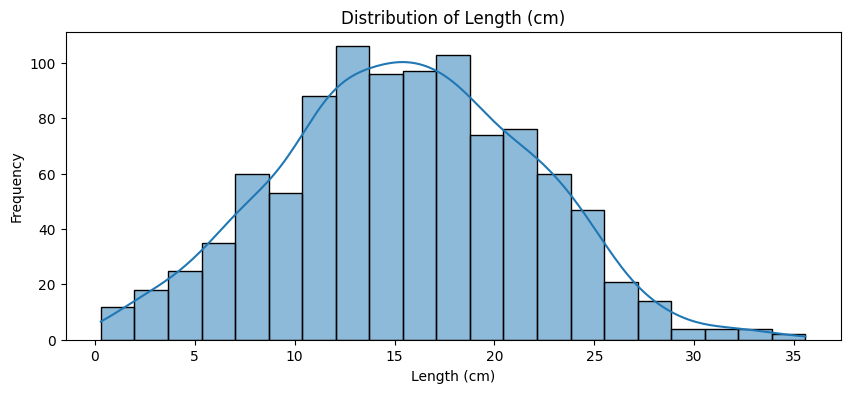

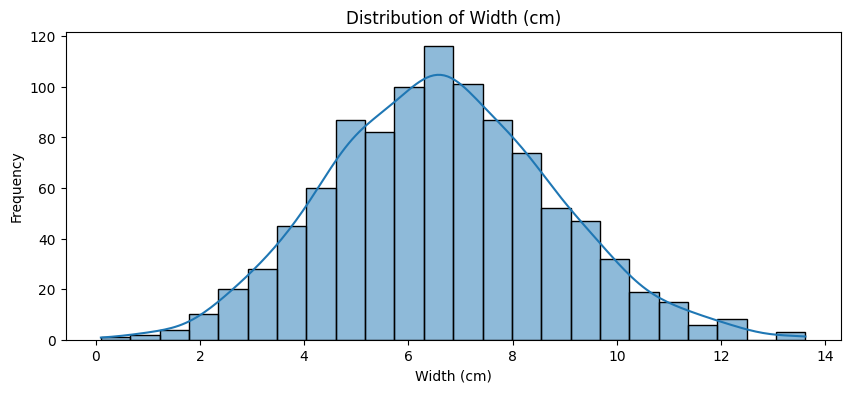

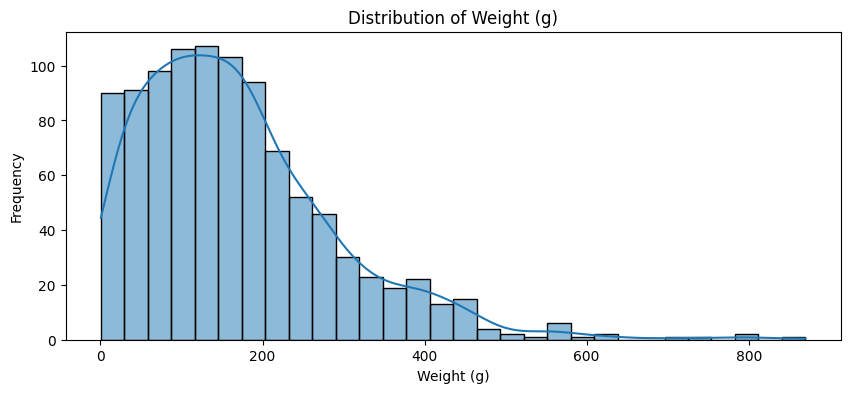

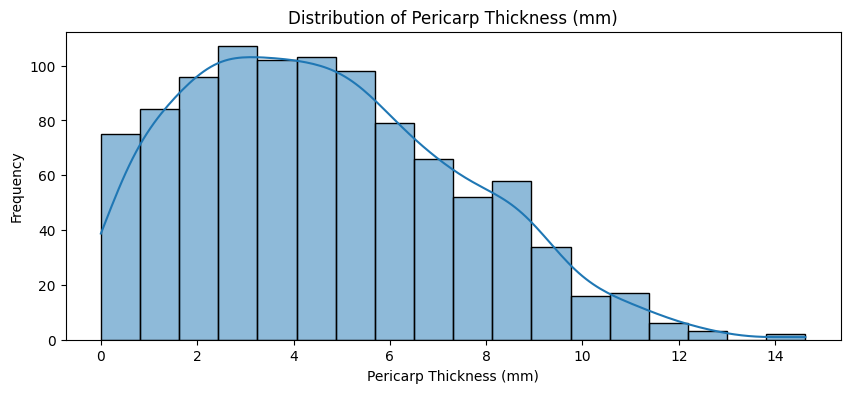

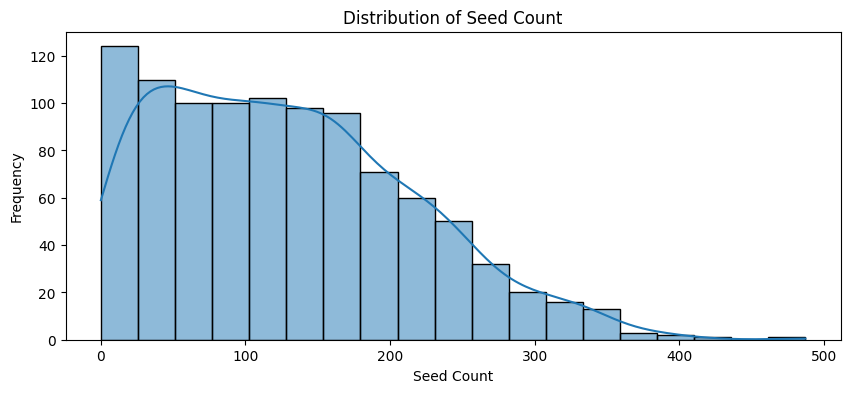

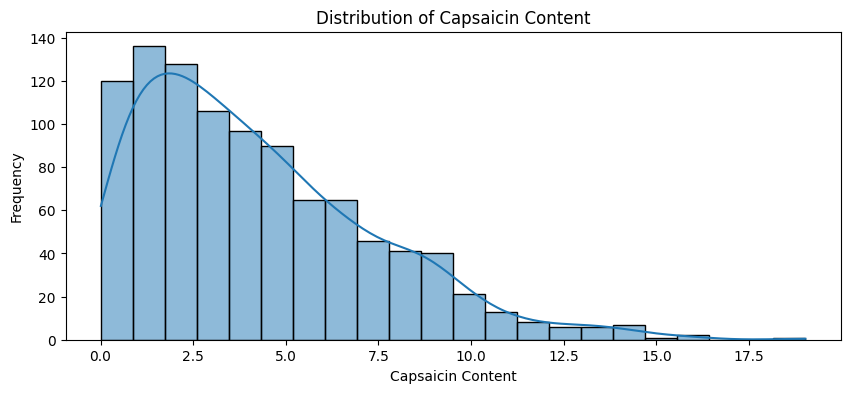

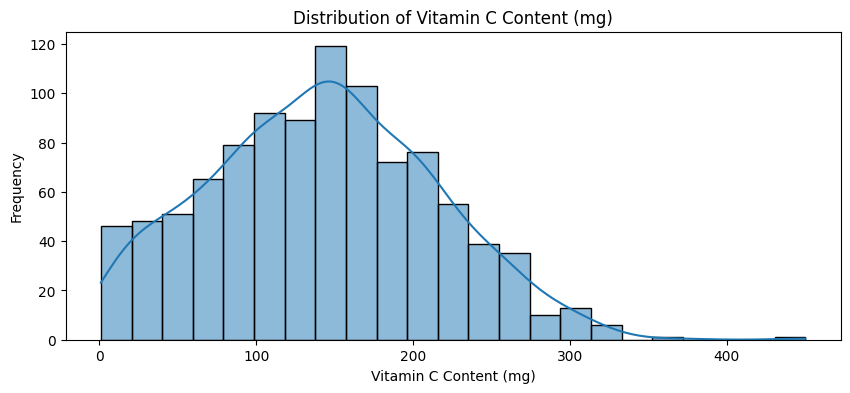

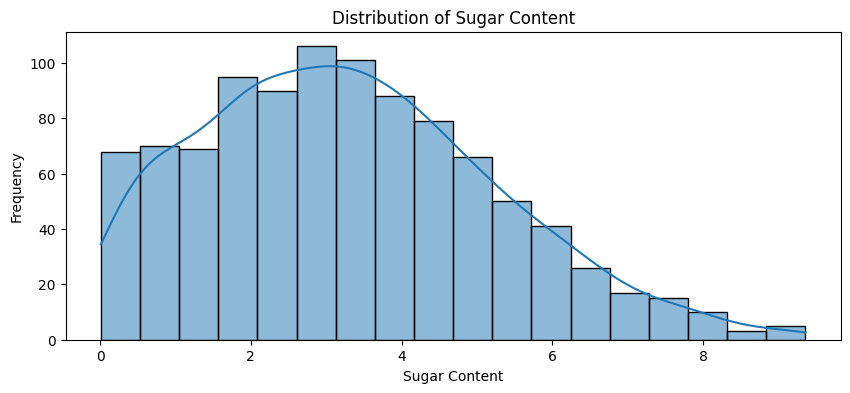

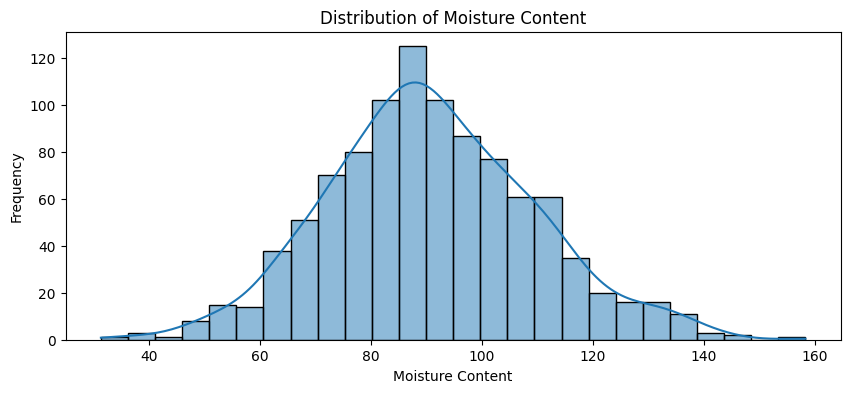

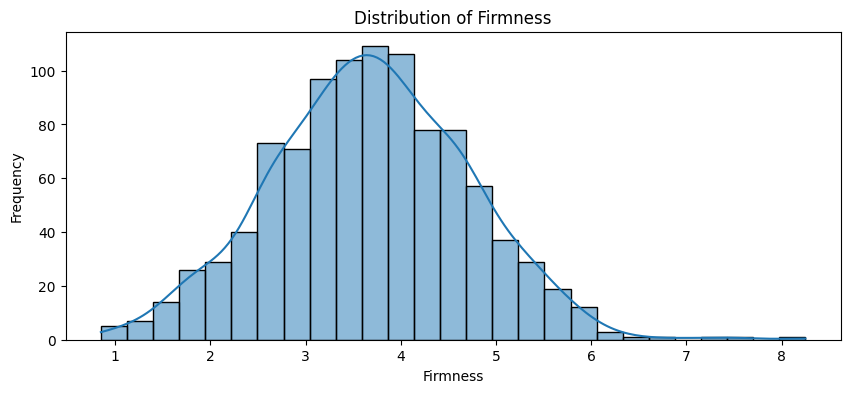

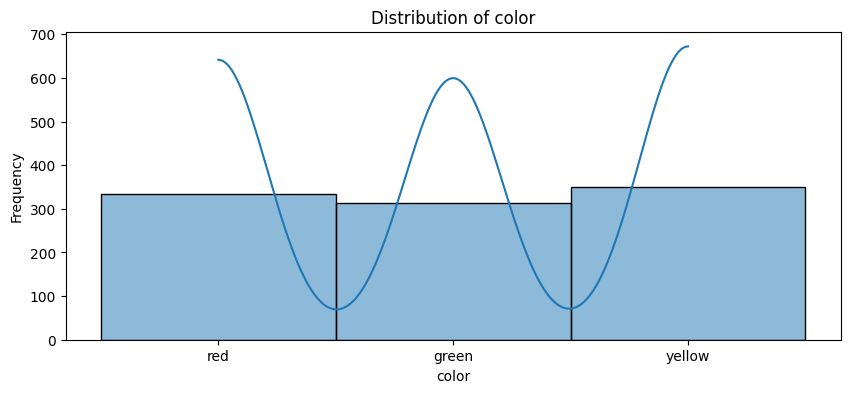

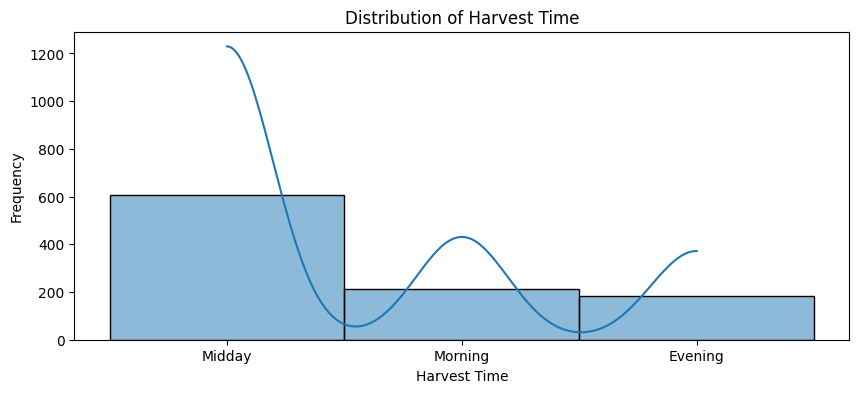

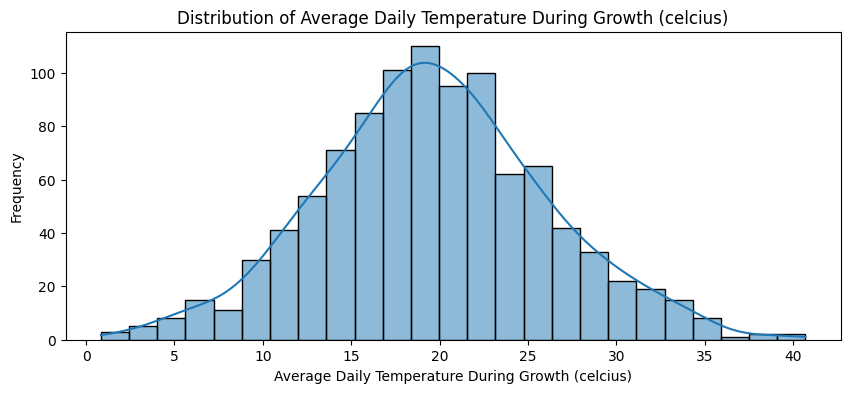

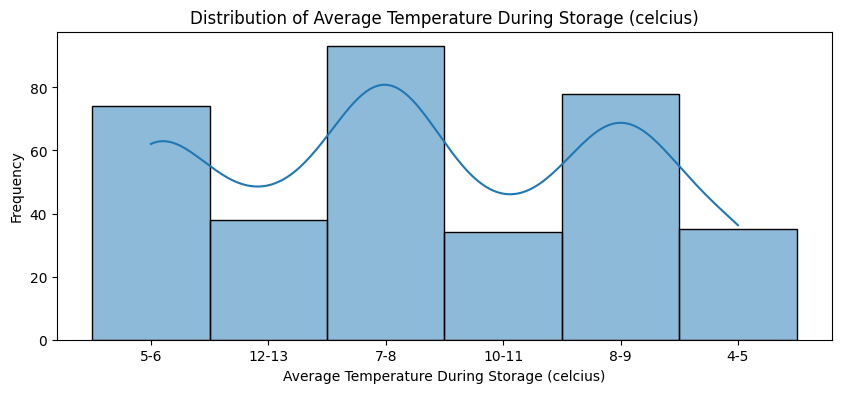

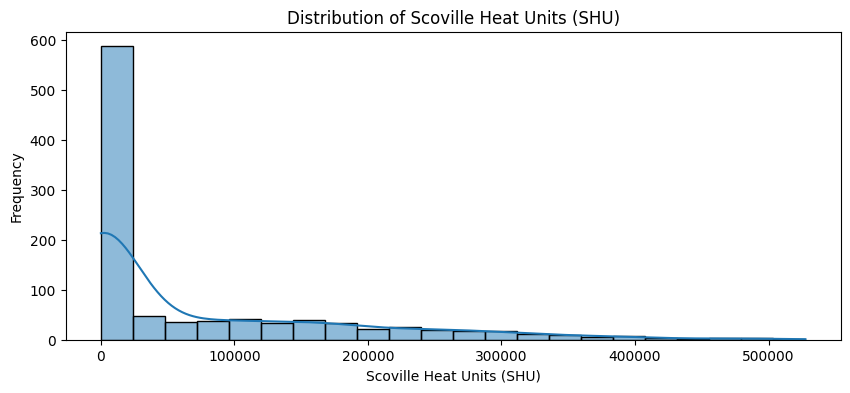

In [4]:
for column in df.columns:
    plt.figure(figsize=(10, 4))
    sns.histplot(df[column], kde=True)  # kde (Kernel Density Estimate) adds a density curve
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()

In [5]:
df.describe()

,Length (cm),Width (cm),Weight (g),Pericarp Thickness (mm),Seed Count,Capsaicin Content,Vitamin C Content (mg),Sugar Content,Moisture Content,Firmness,Average Daily Temperature During Growth (celcius),Scoville Heat Units (SHU)
count,999.000000,999.000000,999.000000,998.000000,999.000000,999.000000,1000.000000,999.000000,1000.000000,999.000000,1000.000000,1000.000000
mean,15.574675,6.641572,169.346406,4.619499,128.731301,4.215385,142.035180,3.283534,90.878380,3.679179,19.641960,70941.260020
std,6.267303,2.139023,123.779026,2.829503,87.270366,3.163125,72.246142,1.938264,18.724314,1.034726,6.436255,108149.917069
min,0.300000,0.100000,0.560000,0.000000,0.040000,0.010000,0.950000,0.010000,31.400000,0.850000,0.840000,0.000000
25%,11.290000,5.140000,79.020000,2.400000,55.390000,1.710000,92.290000,1.865000,78.585000,2.980000,15.397500,0.000000
50%,15.520000,6.600000,147.230000,4.280000,119.490000,3.590000,141.730000,3.140000,89.690000,3.660000,19.495000,0.000000
75%,19.900000,8.045000,227.625000,6.560000,186.845000,6.115000,192.720000,4.555000,103.200000,4.375000,23.530000,121349.617500
max,35.570000,13.620000,869.970000,14.630000,487.260000,19.020000,450.290000,9.360000,158.300000,8.250000,40.700000,527639.860000


In [6]:
df.head()

,Length (cm),Width (cm),Weight (g),Pericarp Thickness (mm),Seed Count,Capsaicin Content,Vitamin C Content (mg),Sugar Content,Moisture Content,Firmness,color,Harvest Time,Average Daily Temperature During Growth (celcius),Average Temperature During Storage (celcius),Scoville Heat Units (SHU)
0,17.37,5.42,94.30,4.90,193.93,3.21,173.59,6.15,88.59,3.40,red,Midday,8.68,5-6,0.00
1,27.78,4.75,262.71,6.56,186.29,8.19,100.41,2.36,111.20,5.45,green,Midday,22.44,NaN,0.00
2,6.17,3.51,66.72,7.96,298.81,4.69,125.91,6.75,72.98,2.77,red,Midday,24.99,NaN,455995.06
3,6.12,6.07,51.24,4.57,39.36,2.76,143.54,5.93,63.93,1.62,yellow,Midday,13.05,NaN,0.00
4,28.58,4.84,166.51,3.07,194.07,7.01,193.76,2.85,88.19,3.99,red,Midday,27.08,NaN,0.00


In [7]:
df.tail()

,Length (cm),Width (cm),Weight (g),Pericarp Thickness (mm),Seed Count,Capsaicin Content,Vitamin C Content (mg),Sugar Content,Moisture Content,Firmness,color,Harvest Time,Average Daily Temperature During Growth (celcius),Average Temperature During Storage (celcius),Scoville Heat Units (SHU)
995,8.67,6.51,19.00,2.87,1.53,0.63,9.02,0.63,95.54,4.86,yellow,Evening,16.57,NaN,88266.90
996,17.17,9.25,150.86,1.41,386.87,2.27,268.93,2.21,131.71,2.59,yellow,Morning,22.39,NaN,0.00
997,14.16,6.87,124.72,1.97,202.83,3.31,203.84,2.90,114.42,3.17,yellow,Evening,15.84,7-8,0.00
998,3.71,7.12,29.53,1.05,115.61,9.80,45.95,2.39,97.70,4.01,green,Evening,16.05,NaN,188390.86
999,14.33,8.99,179.04,4.19,344.16,2.65,164.35,1.11,80.82,2.95,green,Evening,22.88,NaN,409383.92


In [8]:
nan_per_column = df.isna().sum()
total_nan = df.isna().sum().sum()

# To display the number of NaNs per column
print(nan_per_column)

# To display the total number of NaNs in the DataFrame
print(f"Total number of NaN values in the DataFrame: {total_nan}")

Length (cm)                                            1
Width (cm)                                             1
Weight (g)                                             1
Pericarp Thickness (mm)                                2
Seed Count                                             1
Capsaicin Content                                      1
Vitamin C Content (mg)                                 0
Sugar Content                                          1
Moisture Content                                       0
Firmness                                               1
color                                                  1
Harvest Time                                           0
Average Daily Temperature During Growth (celcius)      0
Average Temperature During Storage (celcius)         648
Scoville Heat Units (SHU)                              0
dtype: int64
Total number of NaN values in the DataFrame: 658


In [9]:
df.drop('Average Temperature During Storage (celcius)', axis=1, inplace=True)




In [10]:
nan_per_column = df.isna().sum()
total_nan = df.isna().sum().sum()

# To display the number of NaNs per column
print(nan_per_column)

# To display the total number of NaNs in the DataFrame
print(f"Total number of NaN values in the DataFrame: {total_nan}")

Length (cm)                                          1
Width (cm)                                           1
Weight (g)                                           1
Pericarp Thickness (mm)                              2
Seed Count                                           1
Capsaicin Content                                    1
Vitamin C Content (mg)                               0
Sugar Content                                        1
Moisture Content                                     0
Firmness                                             1
color                                                1
Harvest Time                                         0
Average Daily Temperature During Growth (celcius)    0
Scoville Heat Units (SHU)                            0
dtype: int64
Total number of NaN values in the DataFrame: 10


In [11]:
# Separate features and target
X = df.drop('Scoville Heat Units (SHU)', axis=1)
y = df['Scoville Heat Units (SHU)']

# Identify column types
numerical_cols = X.select_dtypes(include=['int64', 'float64']).columns
categorical_cols = X.select_dtypes(include=['object']).columns

# Preprocessing steps, i make it ignore unkown categories in the OneHotEncoder
preprocessor = ColumnTransformer([
    ('num', Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
    ]), numerical_cols),  # Apply standard scaling to numerical columns
    ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols)  # Apply one-hot encoding to categorical columns
])

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [12]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet, RANSACRegressor
from sklearn.decomposition import PCA
from sklearn.cross_decomposition import PLSRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures

# Initialize models
models = {
    'Linear Regression': LinearRegression(),
    'Ridge Regression': Ridge(),
    'Lasso Regression': Lasso(),
    'ElasticNet Regression': ElasticNet(),
    'RANSAC Regression': RANSACRegressor(),
    'Polynomial Regression': Pipeline([
        ('polynomial_features', PolynomialFeatures(degree=2)),
        ('linear_regression', LinearRegression())
    ]),
    'PCR': Pipeline([
        ('pca', PCA(n_components=10)),  # Adjust n_components as needed
        ('linear_regression', LinearRegression())
    ]),
    'PLS': PLSRegression(n_components=10)  # Adjust n_components as needed
}

# Function to evaluate models with preprocessor included
def evaluate_models(models, X_train, y_train):
    results = {}
    for name, model in models.items():
        # Create a pipeline that includes the preprocessor and the model
        pipeline = Pipeline(steps=[('preprocessor', preprocessor), ('model', model)])
        
        # Perform cross-validation
        mae_scores = -cross_val_score(pipeline, X_train, y_train, scoring='neg_mean_absolute_error', cv=5)
        
        # Store results
        results[name] = mae_scores
        print(f"{name}: Mean MAE = {mae_scores.mean():.4f} (+/- {mae_scores.std():.4f})")

    return results

# Evaluate models
model_results = evaluate_models(models, X_train, y_train)



Linear Regression: Mean MAE = 69580.9827 (+/- 1958.2281)
Ridge Regression: Mean MAE = 69582.9951 (+/- 1958.4482)
Lasso Regression: Mean MAE = 69581.4574 (+/- 1959.2715)
ElasticNet Regression: Mean MAE = 70872.9214 (+/- 2748.8513)


c:\Users\Kristian Røhne\anaconda3\envs\dat200_env\lib\site-packages\sklearn\metrics\_regression.py:1187: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
c:\Users\Kristian Røhne\anaconda3\envs\dat200_env\lib\site-packages\sklearn\metrics\_regression.py:1187: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
c:\Users\Kristian Røhne\anaconda3\envs\dat200_env\lib\site-packages\sklearn\metrics\_regression.py:1187: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
c:\Users\Kristian Røhne\anaconda3\envs\dat200_env\lib\site-packages\sklearn\metrics\_regression.py:1187: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
c:\Users\Kristian Røhne\anaconda3\envs\dat200_env\lib\site-packages\skle

RANSAC Regression: Mean MAE = nan (+/- nan)
Polynomial Regression: Mean MAE = 47563899992599.4844 (+/- 95127799827150.1875)
PCR: Mean MAE = 69061.5191 (+/- 2121.0063)
PLS: Mean MAE = 69580.9554 (+/- 1958.1906)


In [13]:
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.metrics import make_scorer, mean_absolute_error

# Assuming 'preprocessor' is already defined and includes StandardScaler for numerical features
# and OneHotEncoder for categorical features, as per your earlier description

# Define the pipeline with preprocessing, PCA, and linear regression
pcr_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('pca', PCA()),  # We'll tune the number of components
    ('linear_regression', LinearRegression())
])

# Define the hyperparameter space for PCA. Here we are assuming a range, 
# but you should adjust it according to the specifics of your dataset.
param_grid = {
    'pca__n_components': range(1, min(len(numerical_cols), 10)),  # Assuming numerical_cols is defined
}

# Create the GridSearchCV object
pcr_grid_search = GridSearchCV(estimator=pcr_pipeline,
                               param_grid=param_grid,
                               cv=5,  # 5-fold cross-validation
                               scoring=make_scorer(mean_absolute_error, greater_is_better=False),
                               n_jobs=-1)  # Use all available cores

# Fit the GridSearchCV object to the data
pcr_grid_search.fit(X, y)

# The best PCR model and parameters from grid search
best_pcr_model = pcr_grid_search.best_estimator_
best_params = pcr_grid_search.best_params_
best_mae = -pcr_grid_search.best_score_

print(f"Best PCR Model: {best_pcr_model}")
print(f"Best Number of Components: {best_params}")
print(f"Best MAE Score: {best_mae}")


Best PCR Model: Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  Index(['Length (cm)', 'Width (cm)', 'Weight (g)', 'Pericarp Thickness (mm)',
       'Seed Count', 'Capsaicin Content', 'Vitamin C Content (mg)',
       'Sugar Content', 'Moisture Content', 'Firmness',
       'Average Daily Temperature During Growth (celcius)'],
      dtype='object')),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  Index(['color', 

In [14]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.metrics import mean_absolute_error
from sklearn.pipeline import Pipeline
from xgboost import XGBClassifier

# Assuming X, y have been defined and 'preprocessor' is already defined

# Binning the target variable for classification
num_bins = 10
y_binned = pd.cut(y, bins=num_bins, labels=False)

# Split data into train and test sets for classification
X_train, X_test, y_train, y_test = train_test_split(
    X, y_binned, test_size=0.2, random_state=42)

# Ensemble Classifiers to evaluate
classifiers = {
    'RandomForestClassifier': RandomForestClassifier(random_state=42),
    'AdaBoostClassifier': AdaBoostClassifier(random_state=42),
    'XGBClassifier': XGBClassifier( random_state=42)
}

# Evaluate each classifier using cross-validation
for classifier_name, classifier in classifiers.items():
    pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                               ('classifier', classifier)])
    cv_scores = cross_val_score(pipeline, X_train, y_train, cv=5, scoring='neg_mean_absolute_error')
    mae_score = -cv_scores.mean()
    std_score = cv_scores.std()
    print(f"{classifier_name}: Mean CV MAE = {mae_score:.4f} (+/- {std_score:.4f})")

# You may also want to fit the classifier on the entire training data and evaluate on the test set
best_mae_score = float('inf')
best_classifier_name = None
best_classifier_pipeline = None

for classifier_name, classifier in classifiers.items():
    pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                               ('classifier', classifier)])
    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)
    mae_score = mean_absolute_error(y_test, y_pred)
    print(f"{classifier_name} - Test MAE: {mae_score:.4f}")
    
    if mae_score < best_mae_score:
        best_mae_score = mae_score
        best_classifier_name = classifier_name
        best_classifier_pipeline = pipeline

print(f"Best classifier based on test MAE is {best_classifier_name} with a score of {best_mae_score:.4f}")


c:\Users\Kristian Røhne\anaconda3\envs\dat200_env\lib\site-packages\sklearn\model_selection\_split.py:737: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(


RandomForestClassifier: Mean CV MAE = 1.0713 (+/- 0.0318)


c:\Users\Kristian Røhne\anaconda3\envs\dat200_env\lib\site-packages\sklearn\model_selection\_split.py:737: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(
c:\Users\Kristian Røhne\anaconda3\envs\dat200_env\lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\Kristian Røhne\anaconda3\envs\dat200_env\lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\Kristian Røhne\anaconda3\envs\dat200_env\lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumv

AdaBoostClassifier: Mean CV MAE = 1.2037 (+/- 0.0549)
XGBClassifier: Mean CV MAE = 1.0850 (+/- 0.0453)
RandomForestClassifier - Test MAE: 1.0800
AdaBoostClassifier - Test MAE: 1.1300


c:\Users\Kristian Røhne\anaconda3\envs\dat200_env\lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


XGBClassifier - Test MAE: 1.1400
Best classifier based on test MAE is RandomForestClassifier with a score of 1.0800


In [15]:
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_absolute_error

# Assuming X and y are already defined, and preprocessor is set up

# Step 1: Binary classification to separate spicy and non-spicy peppers
y_binary = (y > 0).astype(int)  # Convert to binary target

# Split the data
X_train, X_test, y_train_binary, y_test_binary = train_test_split(X, y_binary, test_size=0.2, random_state=42)

# Set up the classifier pipeline
clf_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(random_state=42))
])

# Train the classifier
clf_pipeline.fit(X_train, y_train_binary)

# Predict spiciness on the training set to filter for regression
y_train_pred = clf_pipeline.predict(X_train)
spicy_indices = np.where(y_train_pred > 0)
X_train_spicy = X_train.iloc[spicy_indices]
y_train_spicy = y.iloc[spicy_indices]

# Step 2: Regression to estimate SHU for spicy peppers
# Set up the regression pipeline with PCA
reg_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('pca', PCA(n_components=12)),  # Adjust n_components based on your dataset
    ('regressor', LinearRegression())
])

# Train the regression model on the spicy peppers only
reg_pipeline.fit(X_train_spicy, y_train_spicy)

# Evaluate the classifier using cross-validation
cv_scores_clf = cross_val_score(clf_pipeline, X_train, y_train_binary, cv=5, scoring='neg_mean_absolute_error')
clf_mae = -cv_scores_clf.mean()
print(f"Classifier MAE (binary): {clf_mae}")

# Evaluate the regressor using cross-validation on spicy peppers only
cv_scores_reg = cross_val_score(reg_pipeline, X_train_spicy, y_train_spicy, cv=5, scoring='neg_mean_absolute_error')
reg_mae = -cv_scores_reg.mean()
print(f"Regressor MAE (spicy peppers): {reg_mae}")

# To make final predictions, you would use clf_pipeline to predict spiciness on X_test, 
# then apply reg_pipeline to the spicy subset to predict SHU.


Classifier MAE (binary): 0.13625
Regressor MAE (spicy peppers): 89377.35406762916
